<a href="https://colab.research.google.com/github/idleyui/alchemy-101/blob/master/dlwp/6_2_understanding_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding recurrent neural networks

In [2]:
ls

0tIo  imdb/  sample_data/


In [0]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [3]:
inputs, state_t, final_output_sequence

(array([[0.92618241, 0.22051728, 0.75570664, ..., 0.52003613, 0.4683115 ,
         0.41732322],
        [0.80924932, 0.18301626, 0.83835042, ..., 0.30545479, 0.9099003 ,
         0.68058798],
        [0.82250322, 0.49505169, 0.80682068, ..., 0.12390122, 0.04371019,
         0.75802496],
        ...,
        [0.99379842, 0.76763956, 0.7514293 , ..., 0.46114383, 0.17292996,
         0.39646635],
        [0.61373375, 0.82888627, 0.21531675, ..., 0.24055931, 0.72988397,
         0.28079975],
        [0.49179683, 0.69575596, 0.95171207, ..., 0.95047038, 0.94410037,
         0.94197375]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.99999965, 0.99997639, 0.99999847, ..., 1.        , 1.        ,
        1.        ]))

In [4]:
!wget http://mng.bz/0tIo --no-check-certificate

--2019-05-06 02:29:03--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2019-05-06 02:29:04--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2019-05-06 02:29:04--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.224.243
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.224.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  26.1MB/s    in 2.2s    

2019-05-06 02:29:07 (26.1 MB/s) - ‘0tIo’ saved [60711700/6071170

In [5]:
!unzip 0tIo -d imdb

Archive:  0tIo
   creating: imdb/aclImdb/
  inflating: imdb/aclImdb/.DS_Store  
   creating: imdb/__MACOSX/
   creating: imdb/__MACOSX/aclImdb/
  inflating: imdb/__MACOSX/aclImdb/._.DS_Store  
   creating: imdb/aclImdb/test/
  inflating: imdb/aclImdb/test/.DS_Store  
   creating: imdb/__MACOSX/aclImdb/test/
  inflating: imdb/__MACOSX/aclImdb/test/._.DS_Store  
   creating: imdb/aclImdb/test/neg/
  inflating: imdb/aclImdb/test/neg/0_2.txt  
   creating: imdb/__MACOSX/aclImdb/test/neg/
  inflating: imdb/__MACOSX/aclImdb/test/neg/._0_2.txt  
  inflating: imdb/aclImdb/test/neg/10000_4.txt  
  inflating: imdb/__MACOSX/aclImdb/test/neg/._10000_4.txt  
  inflating: imdb/aclImdb/test/neg/10001_1.txt  
  inflating: imdb/__MACOSX/aclImdb/test/neg/._10001_1.txt  
  inflating: imdb/aclImdb/test/neg/10002_3.txt  
  inflating: imdb/__MACOSX/aclImdb/test/neg/._10002_3.txt  
  inflating: imdb/aclImdb/test/neg/10003_3.txt  
  inflating: imdb/__MACOSX/aclImdb/test/neg/._10003_3.txt  
  inflating: imdb/a

In [6]:
!cat imdb/aclImdb/train/pos/0_9.txt

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
!pip install numpy==1.16.2

     |████████████████████████████████| 17.3MB 9.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
input_train.shape, input_test.shape

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


((25000, 500), (25000, 500))

In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6704 - acc: 0.5802 - val_loss: 0.5913 - val_acc: 0.6756
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4395 - acc: 0.8066 - val_loss: 0.5186 - val_acc: 0.7370
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3059 - acc: 0.8765 - val_loss: 0.3518 - val_acc: 0.8530
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2258 - acc: 0.9143 - val_loss: 0.4283 - val_acc: 0.8118
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1654 - acc: 0.9402 - val_loss: 0.3600 - val_acc: 0.8690
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1064 - acc: 0.9630 - val_loss: 0.4367 - val_acc: 0.8436
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'y', label='Validaion loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

In [10]:
plot(history.history)

In [13]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
lstm_history = lstm_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.5141 - acc: 0.7595 - val_loss: 0.4405 - val_acc: 0.8098
Epoch 2/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2949 - acc: 0.8877 - val_loss: 0.2861 - val_acc: 0.8838
Epoch 3/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2316 - acc: 0.9121 - val_loss: 0.2841 - val_acc: 0.8904
Epoch 4/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.2015 - acc: 0.9262 - val_loss: 0.3119 - val_acc: 0.8872
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1785 - acc: 0.9352 - val_loss: 0.3426 - val_acc: 0.8732
Epoch 6/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1588 - acc: 0.9430 - val_loss: 0.4991 - val_acc: 0.8246
Epoch 7/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1475 - acc: 0.9487 - val_loss: 0.3720 - v

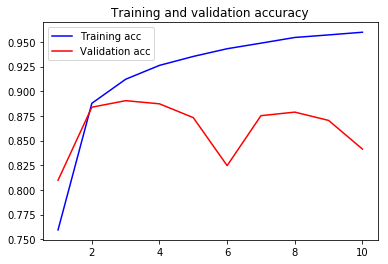

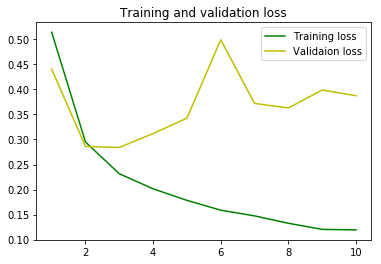

In [14]:
plot(lstm_history.history)